In [142]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [143]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


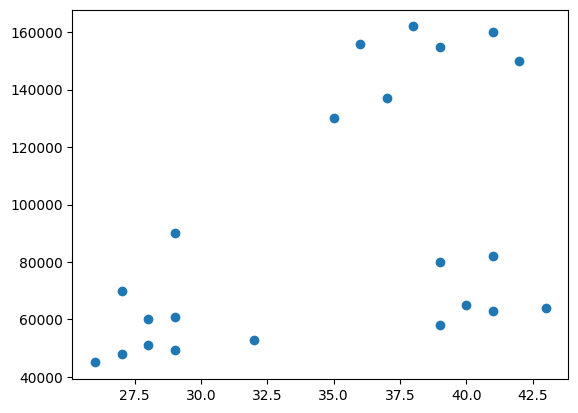

In [144]:
plt.scatter(df['Age'], df['Income($)'])
plt.show()

In [145]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [146]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


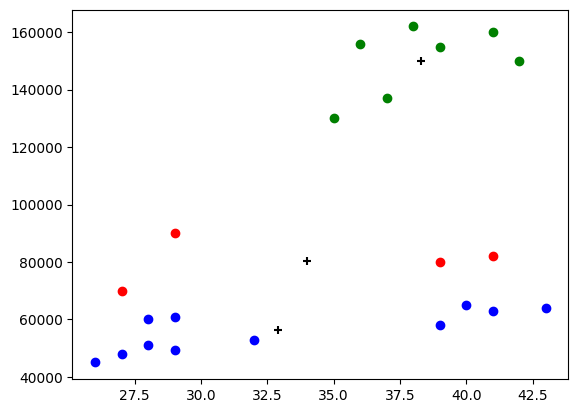

In [147]:
plt.scatter(df[df['cluster'] == 0]['Age'], df[df['cluster'] == 0]['Income($)'], color='red')
plt.scatter(df[df['cluster'] == 1]['Age'], df[df['cluster'] == 1]['Income($)'], color='green')
plt.scatter(df[df['cluster'] == 2]['Age'], df[df['cluster'] == 2]['Income($)'], color='blue')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='+', color='black')
plt.show()

In [148]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [149]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [150]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


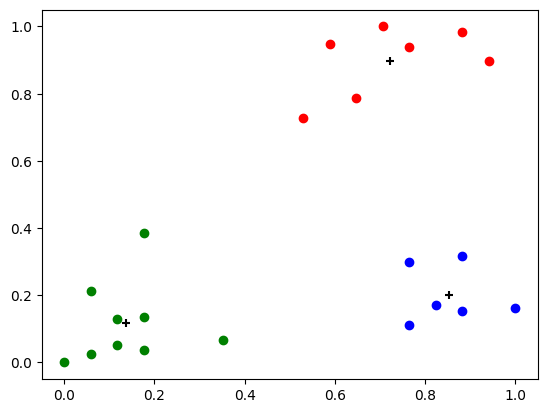

In [151]:
plt.scatter(df[df['cluster'] == 0]['Age'], df[df['cluster'] == 0]['Income($)'], color='red')
plt.scatter(df[df['cluster'] == 1]['Age'], df[df['cluster'] == 1]['Income($)'], color='green')
plt.scatter(df[df['cluster'] == 2]['Age'], df[df['cluster'] == 2]['Income($)'], color='blue')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='+', color='black')
plt.show()

In [152]:
sse = []
for k in range(1, 10):
    km = KMeans(n_clusters=k)
    km.fit(df[['Age' ,'Income($)']])
    sse.append(km.inertia_)

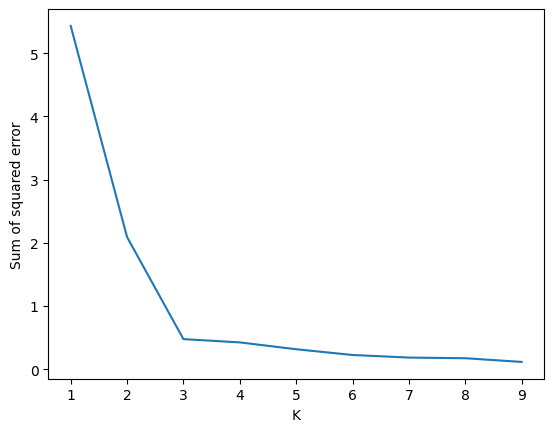

In [153]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(1, 10), sse)
plt.show()